In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load audio file
DEBUSSY_FILE = "../audio/debussy.wav"
REDHOT_FILE = "../audio/redhot.wav"
DUKE_FILE = "../audio/duke.wav"

debussy, sr = librosa.load(DEBUSSY_FILE)  # defalut sr=22050hz, mono=True
redhot, _ = librosa.load(REDHOT_FILE)
duke, _ = librosa.load(DUKE_FILE)

In [ ]:
ipd.Audio(debussy)

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [ ]:
rms_debussy.shape

(1292,)

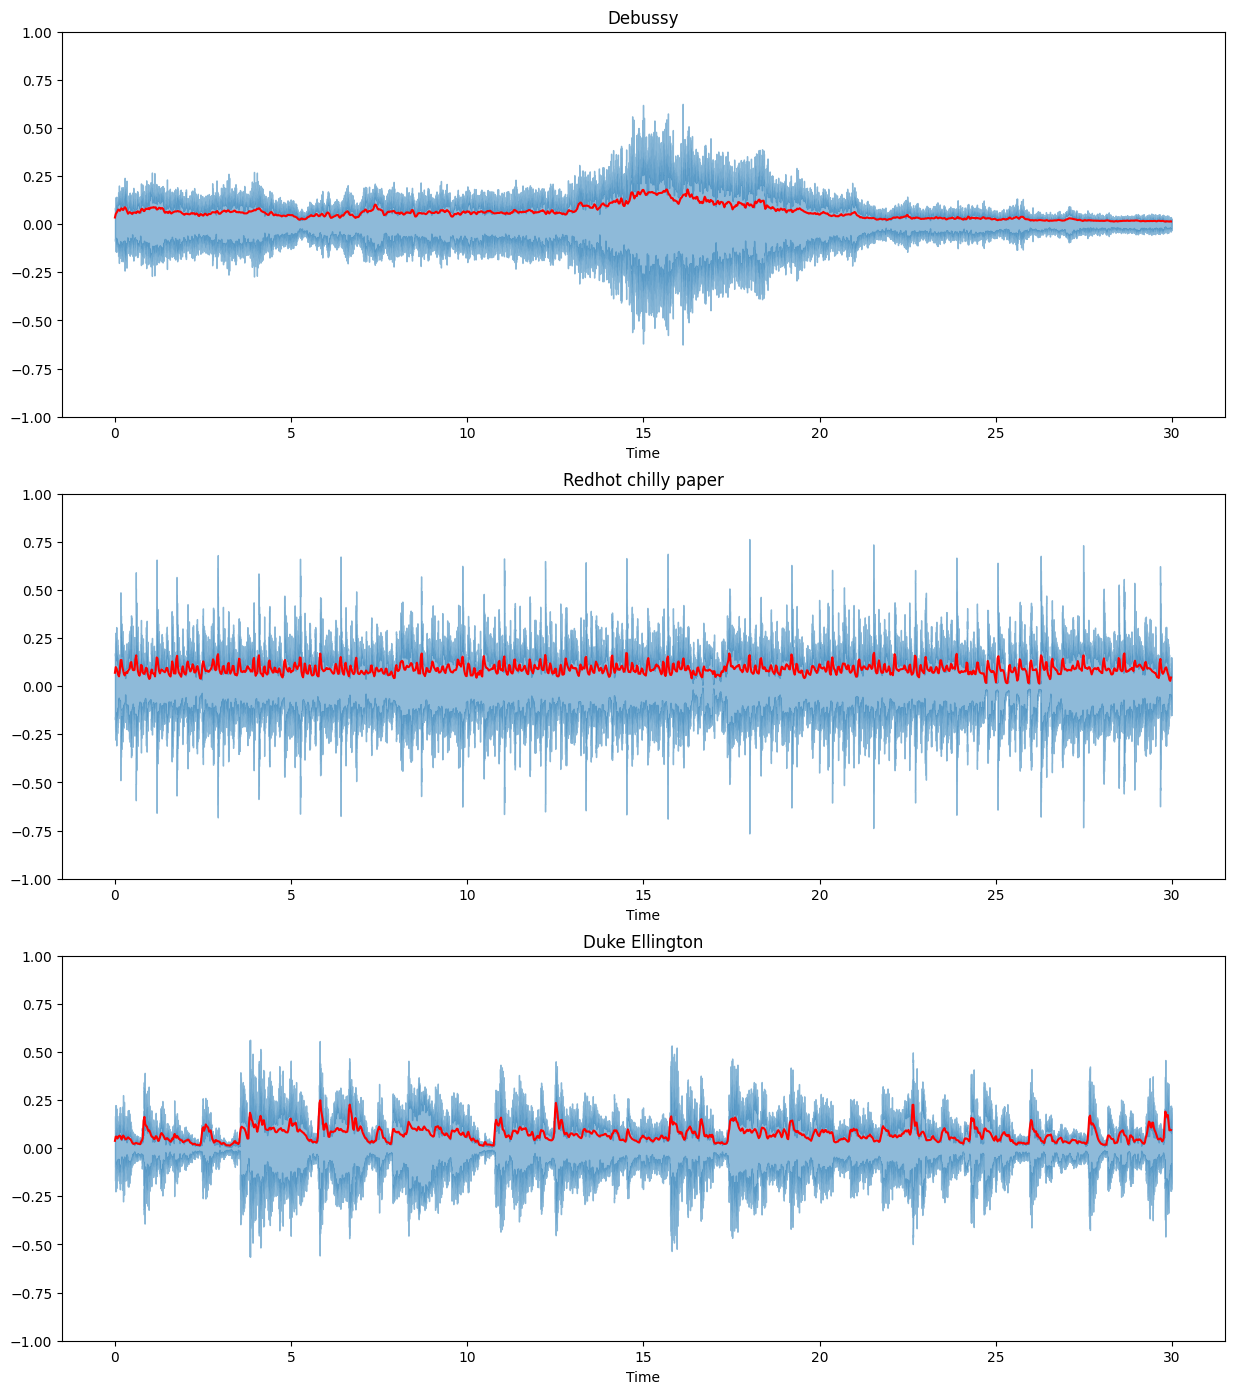

In [ ]:
# plot the RMSE for all the music genre
# visualize amplitude envelope for audio files

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.title("Redhot chilly paper")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.title("Duke Ellington")
plt.ylim(-1, 1)

plt.show()

In [ ]:
def rms(signal, frame_length, hop_length):
    rms = []

    for i in range(0, signal.size, hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i + frame_length]**2) * (1 / frame_length))
        rms.append(rms_current_frame)

    return rms

In [ ]:
rms1_debussy = rms(debussy, FRAME_LENGTH, HOP_LENGTH)
rms1_redhot = rms(redhot, FRAME_LENGTH, HOP_LENGTH)
rms1_duke = rms(duke, FRAME_LENGTH, HOP_LENGTH)

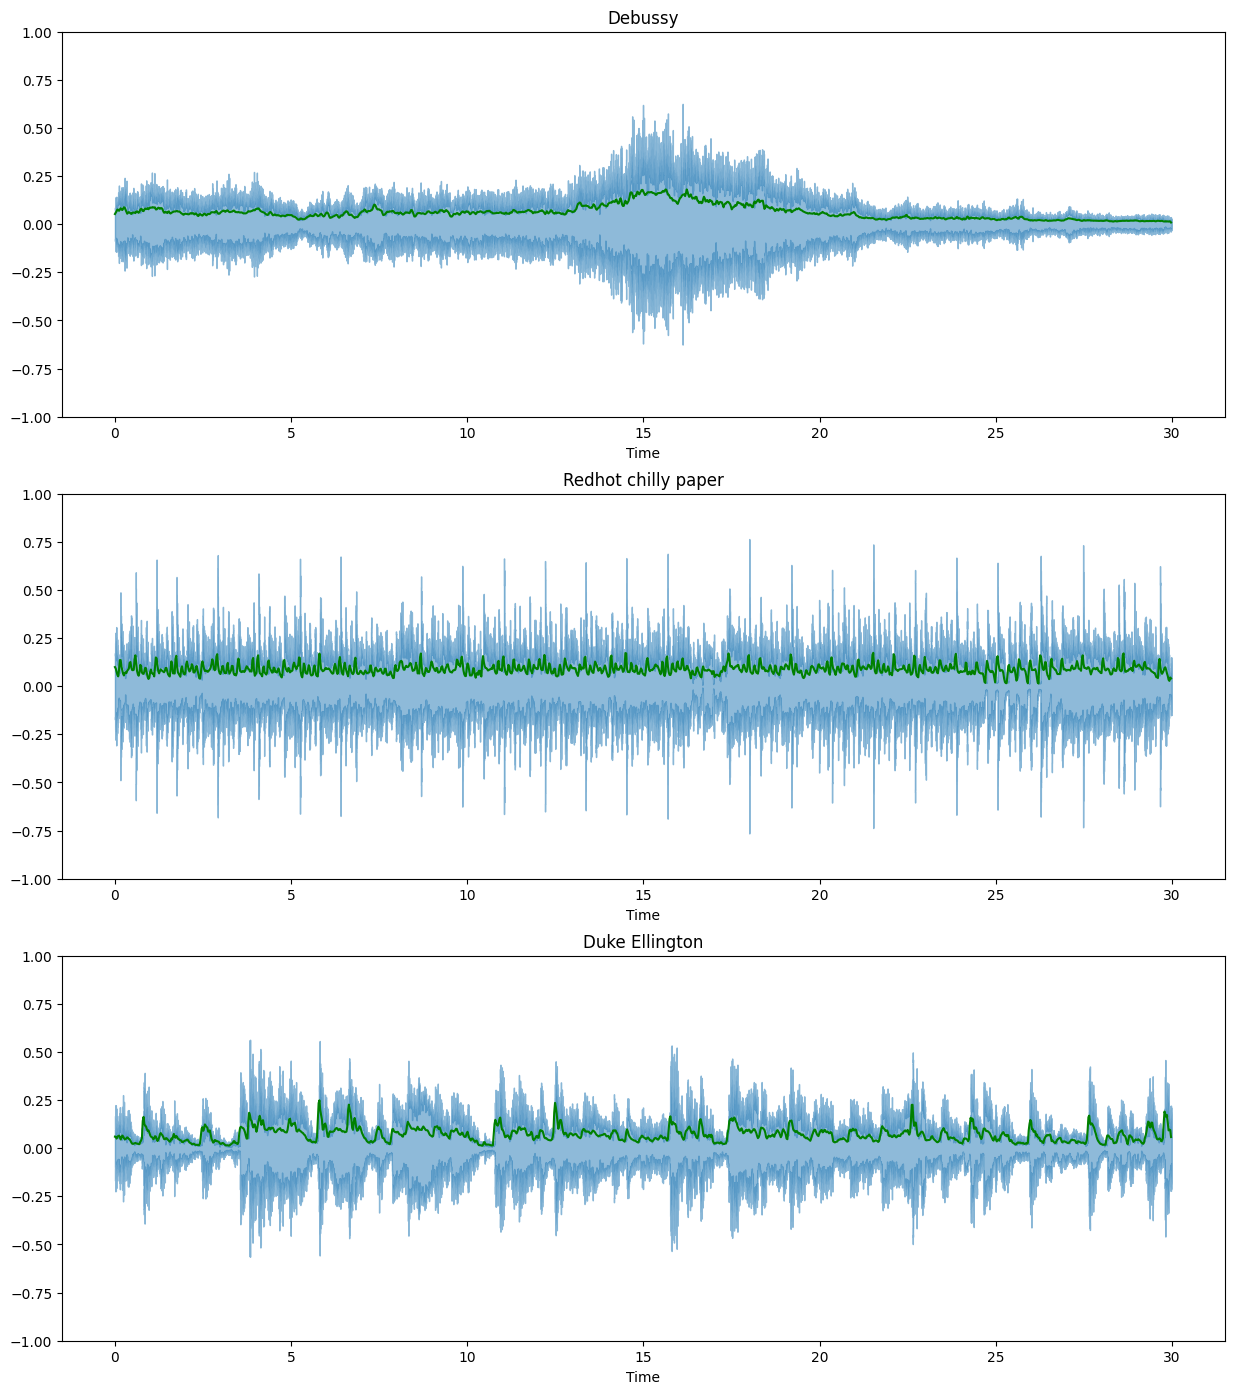

In [ ]:
# plot the RMSE for all the music genre
# visualize amplitude envelope for audio files

frames = range(0, len(rms1_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms1_debussy, color="g")
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms1_redhot, color="g")
plt.title("Redhot chilly paper")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms1_duke, color="g")
plt.title("Duke Ellington")
plt.ylim(-1, 1)

plt.show()

In [ ]:
# Zero-crossing rate
zcr_debussy = librosa.feature.zero_crossing_rate(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

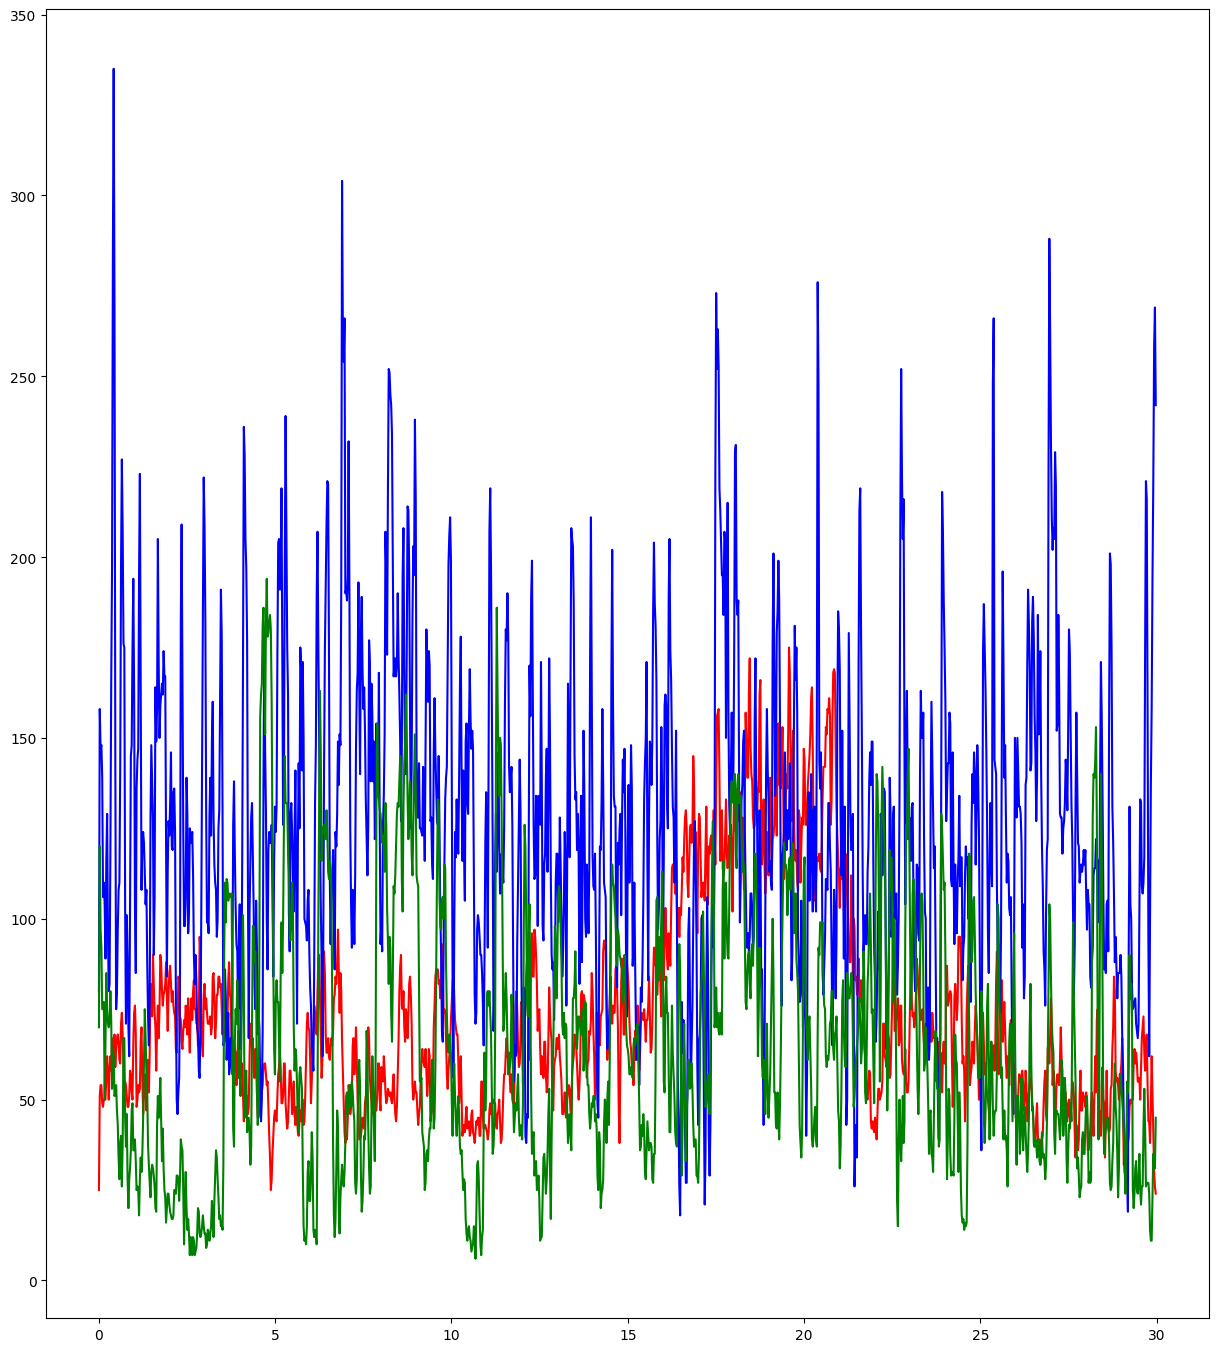

In [ ]:
# plot the RMSE for all the music genre
# visualize amplitude envelope for audio files


plt.figure(figsize=(15, 17))
plt.plot(t, zcr_debussy * FRAME_LENGTH, color='r')
plt.plot(t, zcr_redhot * FRAME_LENGTH, color='b')
plt.plot(t, zcr_duke * FRAME_LENGTH, color='g')

In [ ]:
voice_file = "/content/"